### KNN - K Nearest Neighborns

[Doc KNN](https://scikit-learn.org/stable/modules/neighbors.html)

[O que é e como funciona o KNN](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/)

[Aula Teoria KNN - Portugues](https://meli.udemy.com/course/python-para-data-science-e-machine-learning/learn/lecture/8361642#overview)

[Aula KNN em Python - Portugues](https://meli.udemy.com/course/python-para-data-science-e-machine-learning/learn/lecture/8361654#content)

Algoritmo de classificação de dados que opera de forma muito simples. Ele tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos, se estes forem majoritariamente de uma classe, a amostra será classificada nesta categoria. O nome “KNN”, que refere-se a “k-vizinhos mais próximos”, onde k é um número que podemos determinar, por exemplo, se k = 3 serao analisados os 3 vizinhos mais próximos e assim enquadrar a amostra na categoria predominante entre os vizinhos.

Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas causando o chamado **Overfitting**, onde os dados de treino tem um desempenho excelente, porém os dados de testes tem resultado ruim. Do contrário, quando o k é grande a classificação fica menos sujeita a ruídos, fica mais robusta, porém se for grande demais, pode ocorrer o que chamamos de **Underfitting**, onde o desempenho do modelo já é ruim no próprio treinamento.

[Overfitting e Underfitting](https://didatica.tech/underfitting-e-overfitting/)


#### Pros:

- Modelo simples;
- Processo de treino é trivial
- Funciona muito bem com um grande número de classes.
- Fácil de adicionar mais dados.
- Poucos parâmetros.

#### Contras:

- Elevado custo computacional para predição (pior para grandes conjuntos de dados), é fácil de treinar e caro para prever.
- Não é muito bom em dados com muitos parâmetros.
- Parâmetros categóricos não funcionam muito bem.

### Aulas KNN - Inglês

[Aula 01](https://meli.udemy.com/course/python-for-machine-learning-data-science-masterclass/learn/lecture/23436474#overview)

[Aula 02](https://meli.udemy.com/course/python-for-machine-learning-data-science-masterclass/learn/lecture/23437352#overview)

[Aula 03](https://meli.udemy.com/course/python-for-machine-learning-data-science-masterclass/learn/lecture/23437354#overview)

[Aula 04](https://meli.udemy.com/course/python-for-machine-learning-data-science-masterclass/learn/lecture/23437356#overview)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./5. Machine Learning/K-Nearest-Neighbors/Classified Data')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [5]:
len(df.columns)
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [6]:
#Para este modelo é muito importante normalizar os dados, senão o modelo considerará só os maiores dados
#desconsiderando todos os demais.

from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
df_normal = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
df_param = pd.DataFrame(df_normal, columns=df.columns[:-1])
df_param.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
predict = knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       148
           1       0.91      0.88      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [22]:
print(confusion_matrix(y_test, predict))

[[135  13]
 [ 19 133]]


In [23]:
error_rate = list()

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    error_rate.append(np.mean(predict != y_test))

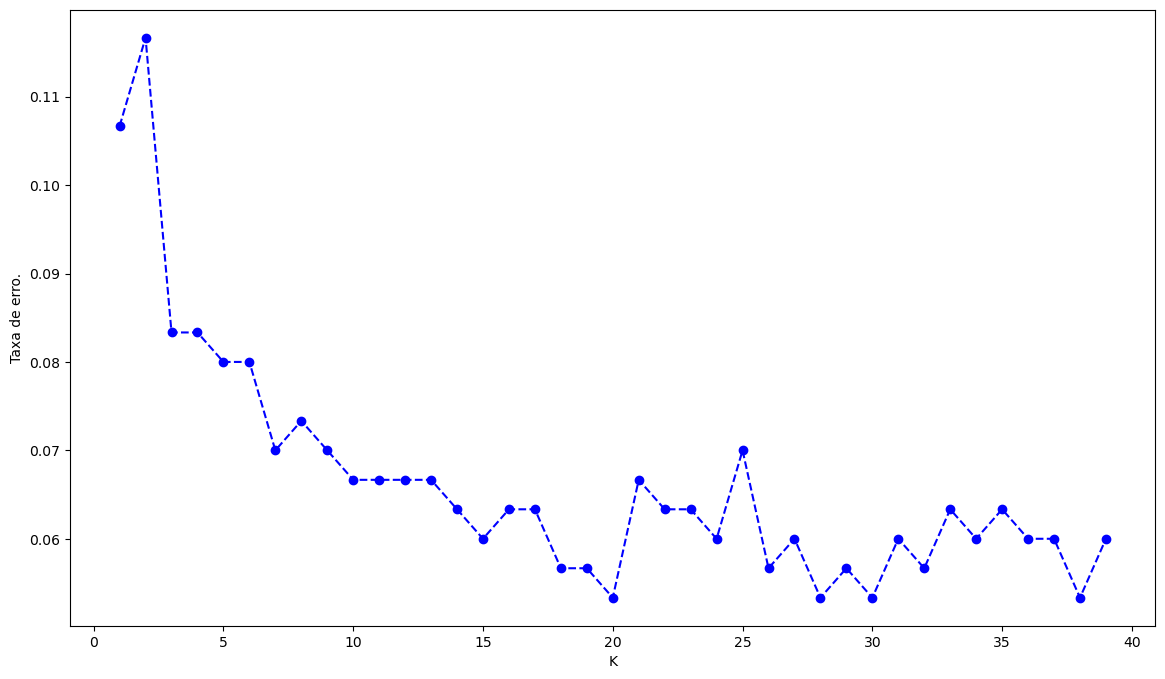

In [24]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de erro.');

In [25]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

In [26]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       148
           1       0.94      0.95      0.95       152

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

